In [108]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [109]:
# Loading the file path
file_path = r"C:\Users\rithe\OneDrive\Desktop\Trader\data.csv"

In [110]:
# Loading the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data
data = load_data(file_path)

In [111]:
def preproceslogic(data):
    # Converting timestamp to float and diving it by 1000
    data['Timestamp'] = data['Timestamp'].apply(lambda x: datetime.fromtimestamp(float(x) / 1000))
    #Converting timestamp into date time format
    data['Timestamp'] = data['Timestamp'].apply(lambda x: x.strftime("%d/%m/%Y"))
    #Converting price column into 3 decimal places
    data['Price'] = data['Price'].apply(lambda x: round(float(x.split('_')[0]),3))

    return data

In [112]:
data = preproceslogic(data)

In [113]:
data.head(5)

,Timestamp,Price
0,25/11/2023,3.40
1,25/11/2023,3.50
2,25/11/2023,3.25
3,25/11/2023,3.25
4,25/11/2023,3.20


In [114]:
print(len(data))

925


In [115]:
data['Timestamp'][924]

'26/11/2023'

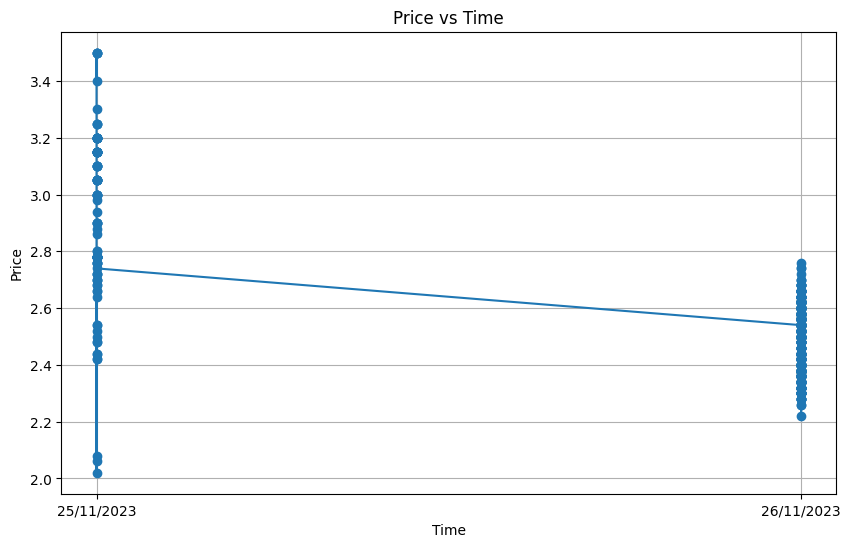

In [116]:
# Plotting the data using matplotlib
plt.figure(figsize=(10,6))
plt.plot(data['Timestamp'], data['Price'], marker='o')
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

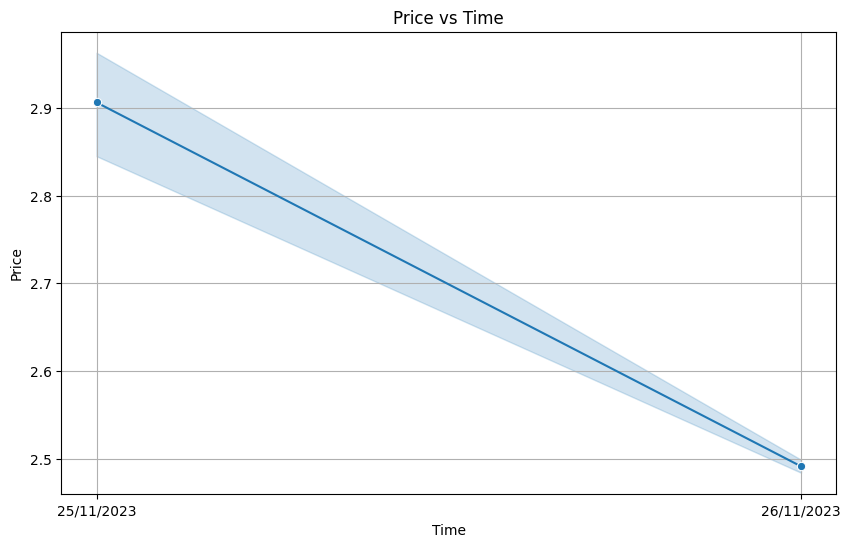

In [117]:
# Plotting with seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Timestamp', y = 'Price', data=data, marker='o')
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

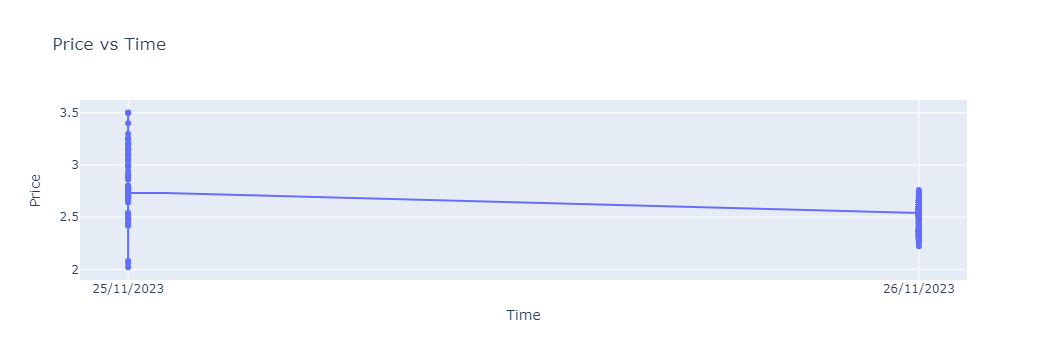

In [118]:
# Plotitng with Plotly Express
fig = px.line(data, x = 'Timestamp', y = 'Price', title = 'Price vs Time', markers=True)
fig.update_layout(xaxis_title='Time', yaxis_title='Price')
fig.show()

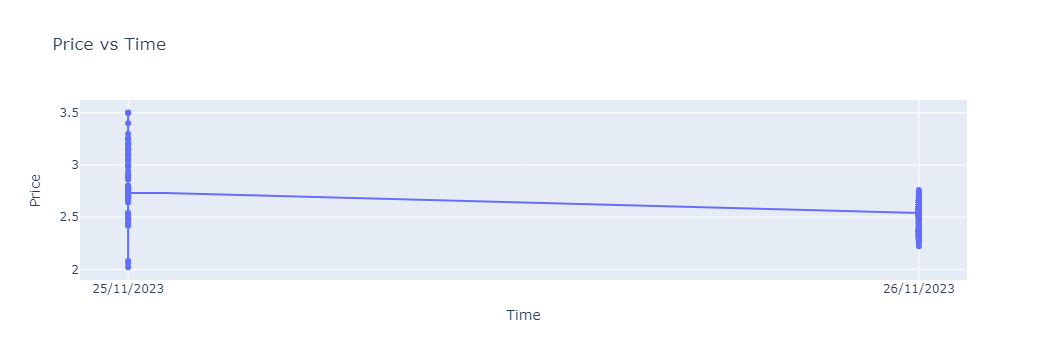

In [119]:
# Plotting with Plotly Graph Objects
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Timestamp'], y=data['Price'], mode='lines+markers', name='Price'))
fig.update_layout(title='Price vs Time', xaxis_title='Time', yaxis_title='Price')
fig.show()

In [120]:
# Function to calculate mean, std deviation and median
def calculate_stats(prices):
    mean_price = np.mean(prices)
    std_dev = np.std(prices)
    median_price = np.median(prices)
    return mean_price, std_dev, median_price
prices = data['Price']

In [121]:
# Calculating using pandas function
def calculate_stats_pandas(prices):
    mean_price = prices.mean()
    std_dev = prices.std()
    median_price = prices.median()
    return mean_price, std_dev, median_price
prices = data['Price']

In [122]:
# Calculating stats using both functions
mean_np, std_dev_np, median_np = calculate_stats(prices)
mean_pd, std_dev_pd, median_pd = calculate_stats_pandas(prices)

In [123]:
# Compare Results
print('Using numpy functions')
print(f"Mean: {mean_np}, Standard Deviation: {std_dev_np}, Median: {median_np}")
print('\nUsing pandas functions')
print(f"Mean: {mean_pd}, Standard Deviation: {std_dev_pd}, Median: {median_pd}")

Using numpy functions
Mean: 2.5349405405405405, Standard Deviation: 0.18950610552734248, Median: 2.52

Using pandas functions
Mean: 2.5349405405405405, Standard Deviation: 0.18960862439095555, Median: 2.52


In [124]:
# Converting prices to different time intervals and plot
# Resample data to different intervals and plot
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format="%d/%m/%Y")

In [125]:
# Aggregate process by mean before resampling
data_agg = data.groupby('Timestamp').mean()

In [126]:
# Resample to different intervals
data_resampled_5min = data_agg.resample('5T').ffill()
data_resampled_10min = data_agg.resample('10T').ffill()
data_resampled_15min = data_agg.resample('15T').ffill()
data_resampled_30min = data_agg.resample('30T').ffill()

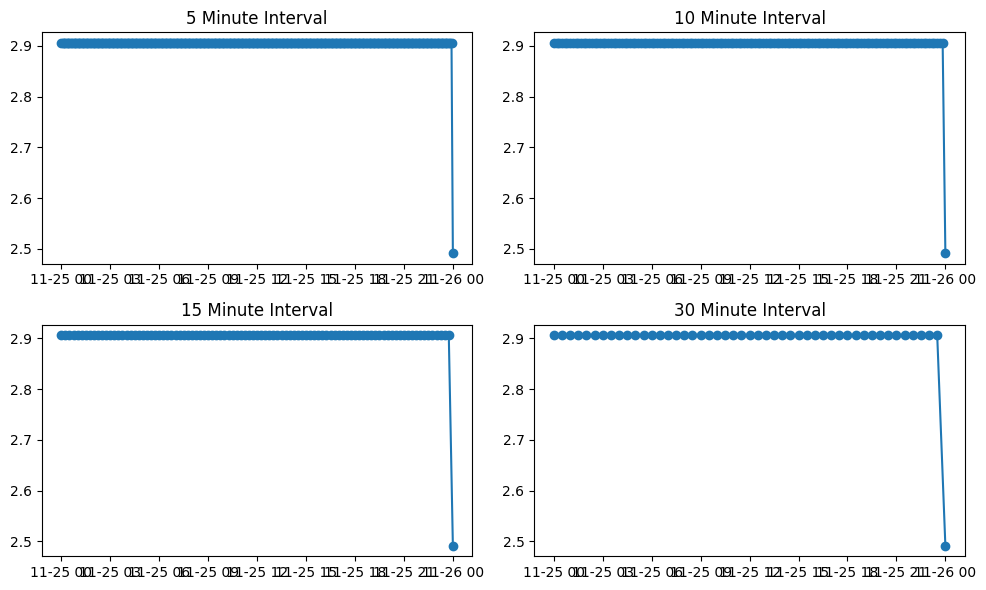

In [127]:
# Plotting
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.plot(data_resampled_5min.index, data_resampled_5min['Price'], marker='o')
plt.title('5 Minute Interval')

plt.subplot(2,2,2)
plt.plot(data_resampled_10min.index, data_resampled_10min['Price'], marker='o')
plt.title('10 Minute Interval')

plt.subplot(2,2,3)
plt.plot(data_resampled_15min.index, data_resampled_15min['Price'], marker='o')
plt.title('15 Minute Interval')

plt.subplot(2,2,4)
plt.plot(data_resampled_30min.index, data_resampled_30min['Price'], marker='o')
plt.title('30 Minute Interval')

plt.tight_layout()
plt.show()


In [128]:
# Calculating stats for resampled data
mean_5min, std_dev_5min, median_5min = calculate_stats(data_resampled_5min['Price'].dropna())
mean_10min, std_dev_10min, median_10min = calculate_stats(data_resampled_10min['Price'].dropna())
mean_15min, std_dev_15min, median_15min = calculate_stats(data_resampled_15min['Price'].dropna())
mean_30min, std_dev_30min, median_30min = calculate_stats(data_resampled_30min['Price'].dropna())

In [129]:
print("Statistics for Different Time Intervals")
print(f"5 Minute Interval - Mean: {mean_5min}, Std Dev: {std_dev_5min}, Median: {median_5min}")
print(f"10 Minute Interval - Mean: {mean_10min}, Std Dev: {std_dev_10min}, Median: {median_10min}")
print(f"15 Minute Interval - Mean: {mean_15min}, Std Dev: {std_dev_15min}, Median: {median_15min}")
print(f"30 Minute Interval - Mean: {mean_30min}, Std Dev: {std_dev_30min}, Median: {median_30min}")

Statistics for Different Time Intervals
5 Minute Interval - Mean: 2.904750493336786, Std Dev: 0.024354007825200464, Median: 2.906185567010309
10 Minute Interval - Mean: 2.903325316723081, Std Dev: 0.03432300344673022, Median: 2.906185567010309
15 Minute Interval - Mean: 2.9019099351376485, Std Dev: 0.041892465663986994, Median: 2.906185567010309
30 Minute Interval - Mean: 2.8977215610583094, Std Dev: 0.05864035337771615, Median: 2.906185567010309


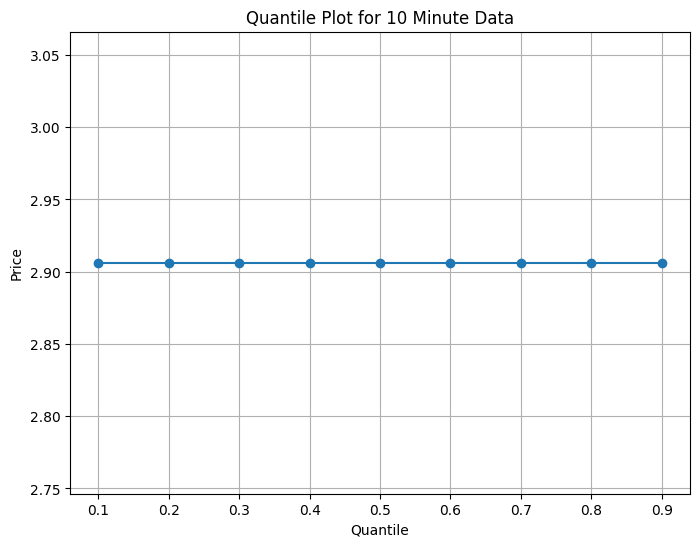

First Quantile (Q1): 2.906185567010309
Third Quantile (Q2): 2.906185567010309
Interquartile Range (IQR): 0.0


In [130]:
# Quantile plot for 10 min data
plt.figure(figsize=(8,6))
data_resampled_10min['Price'].quantile(q=np.linspace(0.1,0.9,9)).plot(marker='o')
plt.title('Quantile Plot for 10 Minute Data')
plt.xlabel('Quantile')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculate first and third quantile
first_quantile = data_resampled_10min['Price'].quantile(0.25)
third_quantile = data_resampled_10min['Price'].quantile(0.75) 

# Calculating IQR = Inter Quartile range
iqr = third_quantile-first_quantile

print(f"First Quantile (Q1): {first_quantile}")
print(f"Third Quantile (Q2): {third_quantile}")
print(f"Interquartile Range (IQR): {iqr}")

In [131]:
# Calculatte the standard deviatoions
std_5min = data_resampled_5min['Price'].std()
std_10min = data_resampled_10min['Price'].std()
std_15min = data_resampled_15min['Price'].std()
std_30min = data_resampled_30min['Price'].std()

print(f"Standard Deviation 5 min: {std_5min}")
print(f"Standard Deviation 10 min: {std_10min}")
print(f"Standard Deviation 15 min: {std_15min}")
print(f"Standard Deviation 30 min: {std_30min}")

Standard Deviation 5 min: 0.024396252449881778
Standard Deviation 10 min: 0.03444197435266799
Standard Deviation 15 min: 0.042110090326652506
Standard Deviation 30 min: 0.059248041663998594


In [132]:
# Calculate price range between intervals
price_change_5_to_10_min = data_resampled_10min['Price'] - data_resampled_5min['Price'].mean()
price_change_10_to_15_min = data_resampled_15min['Price'] - data_resampled_10min['Price'].mean()
price_change_15_to_30_min =data_resampled_30min['Price'] - data_resampled_15min['Price'].mean()

print(f" Price change (5 min to 10 min): {price_change_5_to_10_min}")
print(f" Price change (10 min to 15 min): {price_change_10_to_15_min}")
print(f" Price change (15 min to 30 min): {price_change_15_to_30_min}")


 Price change (5 min to 10 min): Timestamp
2023-11-25 00:00:00    0.001435
2023-11-25 00:10:00    0.001435
2023-11-25 00:20:00    0.001435
2023-11-25 00:30:00    0.001435
2023-11-25 00:40:00    0.001435
                         ...   
2023-11-25 23:20:00    0.001435
2023-11-25 23:30:00    0.001435
2023-11-25 23:40:00    0.001435
2023-11-25 23:50:00    0.001435
2023-11-26 00:00:00   -0.413301
Freq: 10T, Name: Price, Length: 145, dtype: float64
 Price change (10 min to 15 min): Timestamp
2023-11-25 00:00:00    0.002860
2023-11-25 00:15:00    0.002860
2023-11-25 00:30:00    0.002860
2023-11-25 00:45:00    0.002860
2023-11-25 01:00:00    0.002860
                         ...   
2023-11-25 23:00:00    0.002860
2023-11-25 23:15:00    0.002860
2023-11-25 23:30:00    0.002860
2023-11-25 23:45:00    0.002860
2023-11-26 00:00:00   -0.411876
Freq: 15T, Name: Price, Length: 97, dtype: float64
 Price change (15 min to 30 min): Timestamp
2023-11-25 00:00:00    0.004276
2023-11-25 00:30:00    0.00427

In [133]:
# Analyse price variation using delta
delta_5min = data_resampled_5min['Price'].diff().mean()
delta_10min = data_resampled_10min['Price'].diff().mean()
delta_15min =  data_resampled_15min['Price'].diff().mean()
delta_30min =  data_resampled_30min['Price'].diff().mean()

print(f"Avergae delta (5 min): {delta_5min}")
print(f"Avergae delta (10 min): {delta_10min}")
print(f"Avergae delta (15 min): {delta_15min}")
print(f"Avergae delta (30 min): {delta_30min}")

Avergae delta (5 min): -0.0014400565682221882
Avergae delta (10 min): -0.0028801131364443763
Avergae delta (15 min): -0.004320169704666564
Avergae delta (30 min): -0.008640339409333129


In [134]:
# Define the function to calculate expected drop after reaching the previous n_range high
def expected_drop_after_high(data, n_range):
    # Calculate previous n_range high
    previous_high = data['Price'].rolling(window=n_range).max().shift()
    
    # Calculate expected drop in price after reaching previous high
    expected_drop = data['Price'] - previous_high
    
    return expected_drop.mean()

# Example usage for different n_ranges
n_ranges = [5, 10, 15, 20]
for n in n_ranges:
    drop = expected_drop_after_high(data, n)
    print(f"Expected drop after reaching previous {n}-range high: {drop}")

Expected drop after reaching previous 5-range high: -0.03630434782608698
Expected drop after reaching previous 10-range high: -0.056120218579235014
Expected drop after reaching previous 15-range high: -0.06737362637362641
Expected drop after reaching previous 20-range high: -0.07467403314917131


In [136]:
# Define the function to calculate expected drop after reaching the previous n_range high
def expected_drop_after_high(data, n_range):
    # Calculate previous n_range high
    previous_high = data['Price'].rolling(window=n_range).max().shift()
    
    # Calculate expected drop in price after reaching previous high
    expected_drop = data['Price'] - previous_high
    
    return expected_drop.mean()

# Example usage for different n_ranges
n_ranges = [5, 10, 15, 20]
for n in n_ranges:
    drop = expected_drop_after_high(data, n)
    print(f"Expected drop after reaching previous {n}-range high: {drop}")


Expected drop after reaching previous 5-range high: -0.03630434782608698
Expected drop after reaching previous 10-range high: -0.056120218579235014
Expected drop after reaching previous 15-range high: -0.06737362637362641
Expected drop after reaching previous 20-range high: -0.07467403314917131


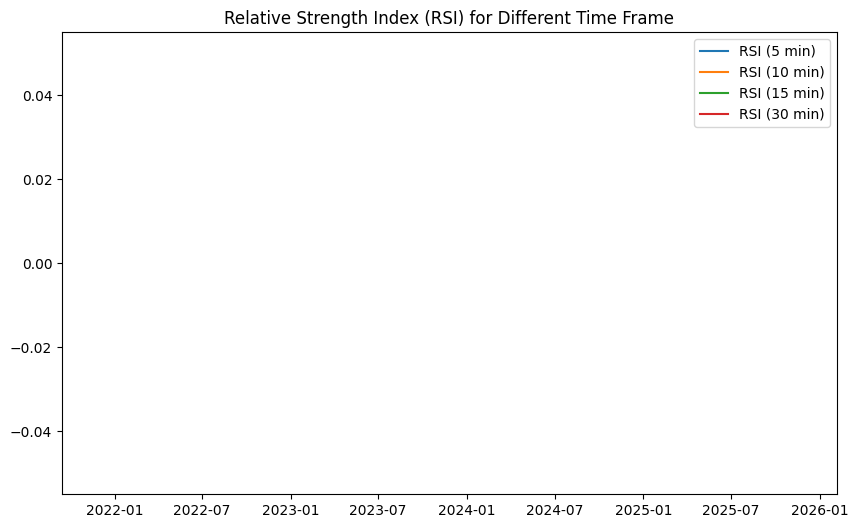

In [137]:
# Using RSI to understand behaviour

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0,0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0,0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1+ rs))
    return rsi

# Calculate RSI for different time frames
rsi_5min = calculate_rsi(data_resampled_5min['Price'])
rsi_10min = calculate_rsi(data_resampled_10min['Price'])
rsi_15min = calculate_rsi(data_resampled_15min['Price'])
rsi_30min = calculate_rsi(data_resampled_30min['Price'])

# Example plots
plt.figure(figsize=(10,6))
plt.plot(data_resampled_5min.index, rsi_5min, label='RSI (5 min)')
plt.plot(data_resampled_10min.index, rsi_10min, label='RSI (10 min)')
plt.plot(data_resampled_15min.index, rsi_15min, label='RSI (15 min)')
plt.plot(data_resampled_30min.index, rsi_30min, label='RSI (30 min)')
plt.title('Relative Strength Index (RSI) for Different Time Frame')
plt.legend()
plt.show()

In [138]:
# Example strategy function to buy/sell based on delta method
def delta_strategy(train_data, threshold):
    signals = pd.Series(0, index=train_data.index)
    signals[train_data['Price'].diff() > threshold] = 1 # Buy Signal
    signals[train_data['Price'].diff() < -threshold] = -1 # Sell signal
    return signals
    
# Split data into train and test sets
train_size = int(0.8 * len(data_resampled_5min))
train_data = data_resampled_5min.iloc[:train_size]
test_data = data_resampled_5min.iloc[train_size:]



In [139]:
# Apply strategy on train data
threshold = 0.1 # Example threshold
train_signals = delta_strategy(train_data, threshold)

In [140]:
train_signals

Timestamp
2023-11-25 00:00:00    0
2023-11-25 00:05:00    0
2023-11-25 00:10:00    0
2023-11-25 00:15:00    0
2023-11-25 00:20:00    0
                      ..
2023-11-25 18:50:00    0
2023-11-25 18:55:00    0
2023-11-25 19:00:00    0
2023-11-25 19:05:00    0
2023-11-25 19:10:00    0
Freq: 5T, Length: 231, dtype: int64

In [141]:
# Evaluate strategy performance on test data
test_signals = delta_strategy(test_data, threshold)
accuracy = (test_signals == test_data['Price'].diff().apply(np.sign)).mean()
print(f"Accuracy of strategy on test data: {accuracy}")

Accuracy of strategy on test data: 0.9827586206896551


In [142]:
# Performance metrics
def calculate_accuracy(strategy_signals, actual_changes):
    return (strategy_signals == actual_changes.apply(np.sign)).mean()

# Example Usage
accuracy_train = calculate_accuracy(train_signals, train_data['Price'].diff())
accuracy_test = calculate_accuracy(test_signals, test_data['Price'].diff())

print(f"Accuracy of strategy on train data: {accuracy_train}")
print(f"Accuracy of strategy on test data: {accuracy_test}")

Accuracy of strategy on train data: 0.9956709956709957
Accuracy of strategy on test data: 0.9827586206896551
